In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import r2_score, mean_squared_error
from gplearn.genetic import SymbolicRegressor

sns.set_style("whitegrid")

DATA_PATH = "../../data/processed/newtons_second_law_cleaned_dataset.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Feature-engineered dataset not found: {DATA_PATH}")

In [2]:
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Loaded dataset: 3000 rows × 7 columns


,Mass_kg,Acceleration_ms2,Force_N,mass_x_acceleration,log_mass,log_acceleration,log_force
0,4.058131,13.486790,54.731161,54.731161,1.400723,2.601711,4.002433
1,9.531786,15.953960,152.069729,152.069729,2.254632,2.769707,5.024339
2,7.453942,5.084311,37.898163,37.898163,2.008743,1.626160,3.634903
3,6.187256,12.534995,77.557215,77.557215,1.822492,2.528524,4.351016
4,1.982177,11.477745,22.750923,22.750923,0.684196,2.440410,3.124606


In [3]:
features = ["Mass_kg", "Acceleration_ms2", "mass_x_acceleration"]
target = "Force_N"

In [4]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model_path = "../../models/newtons_law_regression_model.pkl"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Regression model not found: {model_path}")
reg_model = joblib.load(model_path)

In [6]:
sym_model = SymbolicRegressor()
sym_model._program = None
formula_path = "../../results/formulas/newtons_law_symbolic_expression.txt"

if not os.path.exists(formula_path):
    raise FileNotFoundError(f"Symbolic expression not found: {formula_path}")

with open(formula_path, "r") as f:
    formula_str = f.read()

print(f"Symbolic Expression:\n{formula_str}")

Symbolic Expression:
mul(X1, X0)


In [7]:
y_pred_lr = reg_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

results_df = pd.DataFrame({
    "Model": ["Linear Regression"],
    "R2 Score": [lr_r2],
    "RMSE": [lr_rmse]
})

results_df

,Model,R2 Score,RMSE
0,Linear Regression,1.0,1.609982e-14


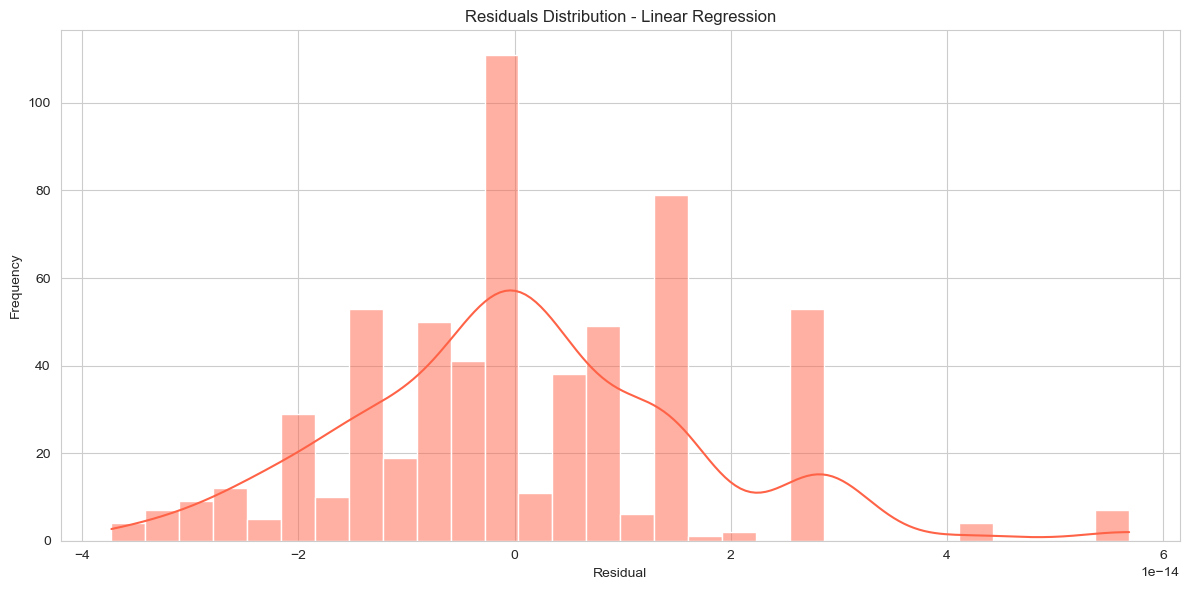

In [8]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color="tomato", bins=30)
plt.title("Residuals Distribution - Linear Regression")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

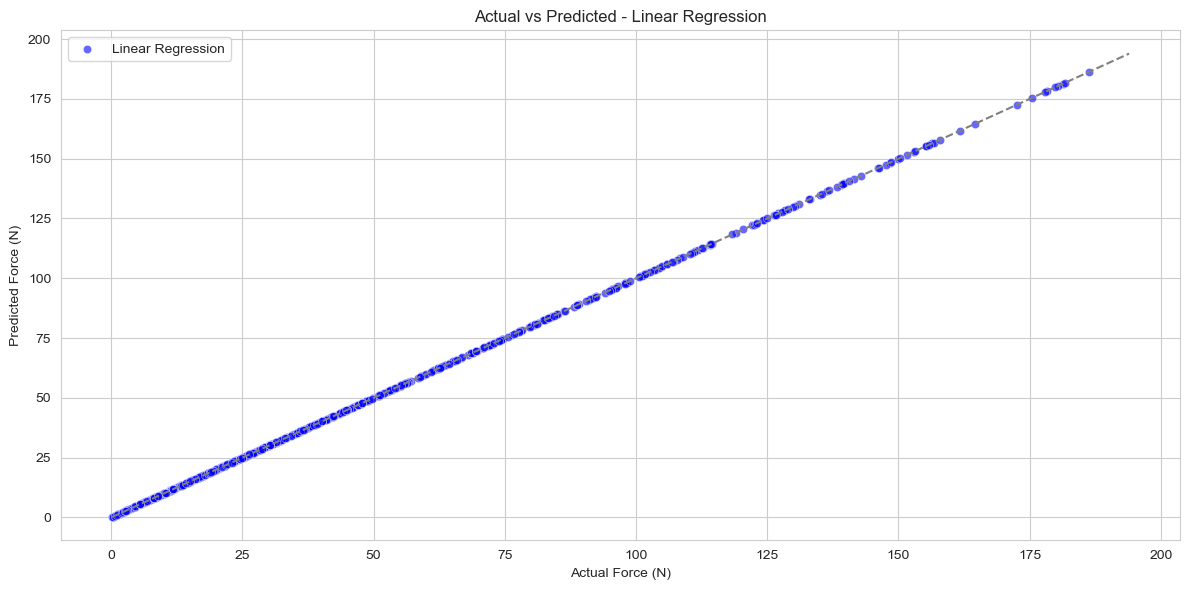

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color="blue", alpha=0.6, label="Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="gray")
plt.xlabel("Actual Force (N)")
plt.ylabel("Predicted Force (N)")
plt.title("Actual vs Predicted - Linear Regression")
plt.legend()
plt.tight_layout()
plt.show()
